In [10]:
import numpy as np
import matplotlib.pyplot as plt

from ddfUtils import *
from ddfRoot import *
from sndUtils import *
from mplStyling import *
import uproot

plt.style.use("root")

In [ ]:
runs = [7080]

In [3]:
chiArrs = pd.DataFrame({
    "chi1":  [2.5, 5.0, 7.5,  10.0, 15.0, 20.0, 30.0,  40.0 ],
    "chi11": [2.0, 3.0, 4.0,  5.0,  7.5,  10.0, 15.0,  20.0 ],
    "chi3":  [2.5, 5.0, 10.0, 15.0, 30.0, 50.0, 80.0,  120.0],
    "chi13": [5.0, 7.5, 10.0, 25.0, 50.0, 80.0, 125.0, 250.0]
})
chiArrs

,chi1,chi11,chi3,chi13
0,2.5,2.0,2.5,5.0
1,5.0,3.0,5.0,7.5
2,7.5,4.0,10.0,10.0
3,10.0,5.0,15.0,25.0
4,15.0,7.5,30.0,50.0
5,20.0,10.0,50.0,80.0
6,30.0,15.0,80.0,125.0
7,40.0,20.0,120.0,250.0


In [4]:
trkeff = {}
for run in runs: 
    trkeff[run] = {}
    
    for tt in (1, 11, 3, 13):
        trkeff[run][f"eff{tt}"] = []
        trkeff[run][f"effErr{tt}"] = []

In [ ]:
for run in runs:
    for i in chiArrs.index:
        chi = chiArrs.at[i, f"chi1"]
        for tt in (1, 11, 3, 13):
            
            # rootFile = uproot.open(f"/eos/user/i/idioniso/mfout/trkeff/trkeff-chi2ndfMax/run_{run:06d}/trkeff_chi2ndf.{chi}_{run}_tc.root")
            rootFile = uproot.open(f"/home/idioniso/tmp/trkeff-chi2ndf/trkeff-{chi}_{run}_tc.root")

            eff    = rootFile[f"eff_{tt}_data.tc"].arrays()["eff"][0]
            effErr = rootFile[f"eff_{tt}_data.tc"].arrays()["effErr"][0]

            trkeff[run][f"eff{tt}"].append(eff)
            trkeff[run][f"effErr{tt}"].append(effErr)

    trkeff[run] = pd.DataFrame(trkeff[run])

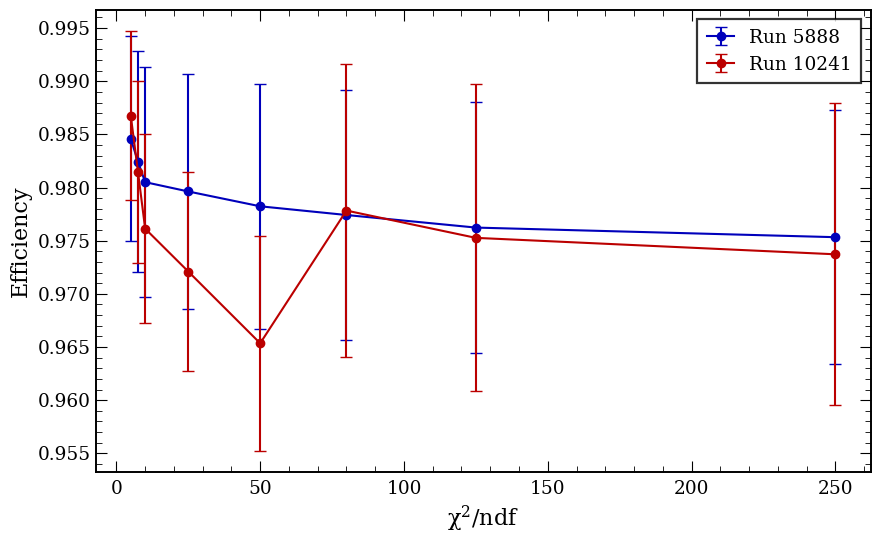

In [9]:
TT = 13

plt.figure(figsize=(10, 6))
for run in runs:
    plt.errorbar(chiArrs[f"chi{TT}"], trkeff[run][f"eff{TT}"], yerr=trkeff[run][f"effErr{TT}"], label=f"Run {run}", capsize=4, marker="o")
plt.xlabel("$\chi^2/ndf$")
plt.ylabel("Efficiency")
plt.legend()

plt.show()